In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.models import Sequential,Model
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam, RMSprop , SGD
import keras 
import keras.backend as B
import numpy as np
import keras.applications as A
import matplotlib.pyplot as plt
%matplotlib inline

import os
from keras import regularizers

In [0]:
os.listdir("../content/gdrive/My Drive/dataset2-master")


['labels.csv', 'images', 'labels.gsheet']

In [0]:
cd "../content/gdrive/My Drive/dataset2-master/"


/content/gdrive/My Drive/dataset2-master


In [0]:
train_path = "images/TRAIN"
test_path = "images/TEST"

In [0]:
inputs = (240,320,3)


In [0]:
# train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],batch_size=50)
# test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],batch_size=50)

In [0]:
vgg = A.vgg16.VGG16(weights='imagenet',include_top=False, input_shape=inputs)
#vgg.summary()





58892288/58889256 [==============================] - 1s 0us/step








In [0]:
model = Sequential()
for layer in vgg.layers[:-4]:
  layer.trainable=False

In [0]:
for layer in vgg.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f18eb28f9b0> False
<keras.layers.convolutional.Conv2D object at 0x7f18eb28fda0> False
<keras.layers.convolutional.Conv2D object at 0x7f18eff31198> False
<keras.layers.pooling.MaxPooling2D object at 0x7f18eff31320> False
<keras.layers.convolutional.Conv2D object at 0x7f18eb1facf8> False
<keras.layers.convolutional.Conv2D object at 0x7f18eb1fd5c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f18eb2002b0> False
<keras.layers.convolutional.Conv2D object at 0x7f18eb2079e8> False
<keras.layers.convolutional.Conv2D object at 0x7f18eb20cb00> False
<keras.layers.convolutional.Conv2D object at 0x7f18eb212860> False
<keras.layers.pooling.MaxPooling2D object at 0x7f18eb21e1d0> False
<keras.layers.convolutional.Conv2D object at 0x7f18ea05c908> False
<keras.layers.convolutional.Conv2D object at 0x7f18ea061a20> False
<keras.layers.convolutional.Conv2D object at 0x7f18ea069780> False
<keras.layers.pooling.MaxPooling2D object at 0x7f18ea075198>

In [0]:
# Add the vgg convolutional base model
model.add(vgg)
 
# Add new layers
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu' ))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 10, 512)        14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 35840)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35840)             143360    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1146912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
____

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest', validation_split=0.25)


validation_datagen = ImageDataGenerator(rescale=1./255 )
 
# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 20

In [0]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(240, 320),
        batch_size=train_batchsize,
        class_mode='categorical', subset = "training")
 
validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(240, 320),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
    subset='validation')

Found 7489 images belonging to 4 classes.
Found 2493 images belonging to 4 classes.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [0]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      verbose=1)

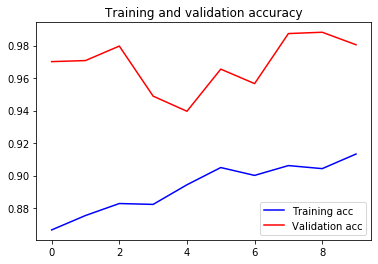

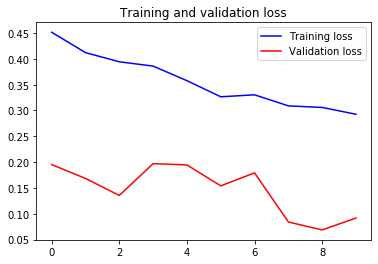

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
print("The best Training accuracy {}".format(max(acc)*100))
print("The best validation accuracy {} ".format(max(val_acc)*100))

The best Training accuracy 91.32885852116065
The best validation accuracy 98.82448289768388 
